In [ ]:
#!pip install stop-words

# Import Librairies 

In [98]:
# manipulate data 
import pandas as pd
import numpy as np

#data vizualisation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objs as go

#nlp
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer

# Upload data

In [99]:
#upload data set
filename_en = './data/small_vocab_en.txt'
filename_fr = './data/small_vocab_fr.txt'
data_en = pd.read_csv(filename_en, sep = "\t", header = None)
data_fr = pd.read_csv(filename_fr, sep = "\t", header = None)

In [100]:
#define corpus
corpus_en = data_en[0]
corpus_fr = data_fr[0]

In [103]:
# define stop words 
stop_words_en = get_stop_words('en')
stop_words_fr = get_stop_words('fr')

# Data Vizualisation

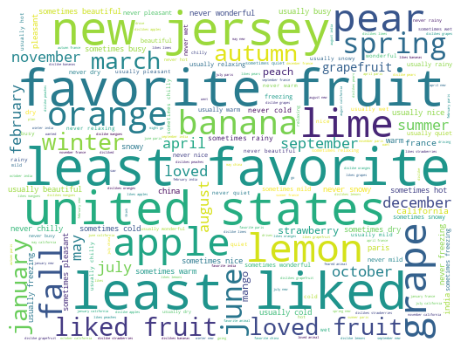

In [104]:
# Wordcloud of english data set
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384, stopwords=stopwords
                         ).generate(" ".join(corpus_en))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

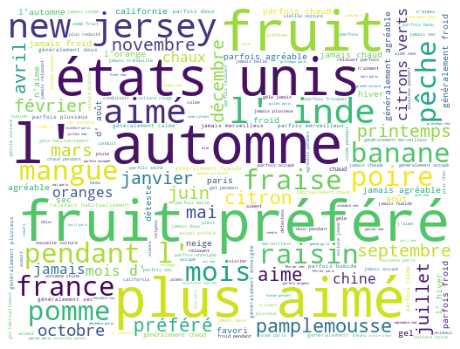

In [105]:
# Wordcloud of french data set
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384, stopwords= stop_words_fr
                         ).generate(" ".join(corpus_fr))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [198]:
#most frequent words in english data set
vect = CountVectorizer(stop_words = stop_words_en)
X = vect.fit_transform(corpus_en)
words = vect.get_feature_names_out()

In [168]:
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

In [169]:
def subsample(x, step=900):
    return np.hstack((x[:20], x[20::step]))

In [170]:
x = subsample(labels)
y = freq
trace = go.Bar(
                x = x,
                y = y,
                name = "Words ordered by rank. The first rank is the most frequent words and the last one is the less present",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)))
               

layout = go.Layout(barmode = "group")
fig = go.Figure(data = trace, layout = layout)
fig.show()

In [194]:
#most frequent words in french data set
vect_fr = CountVectorizer(stop_words = stop_words_fr)
X_fr = vect_fr.fit_transform(corpus_fr)
words_fr = vect_fr.get_feature_names_out()

In [195]:
wsum_fr = np.array(X.sum(0))[0]
ix_fr = wsum.argsort()[::-1]
wrank_fr = wsum_fr[ix] 
labels_fr = [words_fr[i] for i in ix]

In [196]:
freq_fr = subsample(wrank_fr)

In [197]:
x = subsample(labels_fr)
y = freq_fr
trace = go.Bar(
                x = x,
                y = y,
                name = "Words ordered by rank. The first rank is the most frequent words and the last one is the less present",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)))
               

layout = go.Layout(barmode = "group")
fig = go.Figure(data = trace, layout = layout)
fig.show()